In [ ]:
#%matplotlib

In [1]:
#Vertical resolution used : 
0.02
0.1
0.5
1.25010428797
8.33294983235
32.8082236775

32.8082236775

In [2]:
import sys, os

#sys.path.append(os.path.join(os.environ['ATS_SRC_DIR'],'tools','meshing_ats'))
#sys.path.append('/codes/simulator/debug/ats-mesh/tools/meshing_ats/meshing_ats/')
sys.path.append('/Users/ajc/codes/simulator/debug/ats-mesh/tools/meshing_ats/meshing_ats')
import meshing_ats

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy.signal
import importlib

In [3]:
print(meshing_ats.__file__)

/Users/ajc/codes/simulator/debug/ats-mesh/tools/meshing_ats/meshing_ats/meshing_ats.py


In [4]:
import math
def Distance(x,y):
    d = np.zeros(len(x))
    for i in range(len(x)):
        d[i] = math.hypot(x[-1] - x[i], y[-1] - y[i])
    return d

[0.         1.90171975 5.68200009 8.61462553] [4.968 5.321 5.169 5.099]
11 29
left 0.1901719748262033 11
right 0.23974663502900206 29


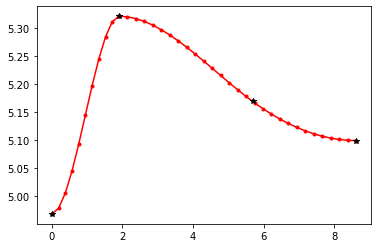

No handles with labels found to put in legend.


---------------------------------------------
center [5.07949 5.04949 4.99949 4.94949 4.89949 4.84949 4.79949 4.74949 4.69949
 4.67949 4.59949 4.49949 4.39949 4.29949 4.09949 3.84949 3.59949] 5.321
5.09949 5.099


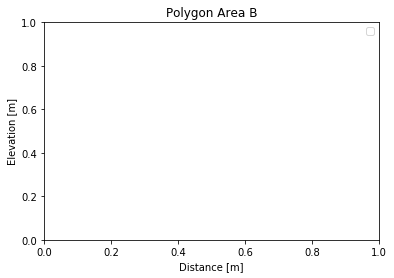

In [5]:
#Vladimir data
site_area = 'C'
case = 1
if site_area == 'C': 
    if case == 1:
        zv = np.array([5.099, 5.169, 5.321, 4.968])
    elif case == 2:
        zv = np.array([5.099, 5.169, 5.421, 4.968])
    elif case == 3:
        zv = np.array([5.099, 5.169, 5.521, 4.968])
    zv =zv[::-1]
    northing = [7910344.103,7910341.163,7910337.608, 7910335.845] #original
    easting = [585907.153,585907.605,585908.893,585909.606]
    distC = Distance(northing,easting)
    distC = distC[::-1]
    print (distC, zv)
    numx1 = int((distC[1] - distC[0]) / 0.17)
    numx2 = int((distC[-1] - distC[1]) / 0.23)
    print (numx1, numx2)
    xnew1 = np.linspace(distC[0],distC[1],numx1)
    xnew2 = np.linspace(distC[1],distC[-1],numx2)
    cs1 = scipy.interpolate.CubicSpline(distC[:2],zv[:2], bc_type='clamped')
    cs2 = scipy.interpolate.CubicSpline(distC[1:],zv[1:], bc_type='clamped')

    
print ('left', xnew1[1] - xnew1[0], numx1)
print ('right', xnew2[-1] - xnew2[-2], numx2)
    
plt.plot(xnew1, cs1(xnew1), '.-', color= 'r', label = 'fitted curve')
plt.plot(xnew2, cs2(xnew2), '.-', color= 'r')
plt.plot(distC, zv, '*', color= 'k', label='measured data')

plt.show()

if 'D' in site_area:
    xnew = xnew1
    zv = cs1(xnew1)
else:
    xnew = np.concatenate((xnew1,xnew2[1:]))
    zv = np.concatenate((cs1(xnew1), cs2(xnew2[1:])))
 
print ('---------------------------------------------')

assert len(zv) == len(xnew)


#trough
observe = 'center'
xloc = 0
mid_pt = (zv[0] + zv[1])/2.

depths_t = [0.02, 0.05, 0.1, 0.15, 0.2, 0.25, 0.30, 0.35, 0.4, 0.5, 0.6,0.7,0.8, 1.0, 1.25, 1.50]
depths_r = [0.02, 0.05, 0.1, 0.15, 0.2, 0.25, 0.30, 0.35, 0.4, 0.5, 0.6,0.7,0.8, 1.0, 1.25, 1.50]
depths_c = [0.02, 0.05, 0.1, 0.15, 0.2, 0.25, 0.30, 00.35, 0.4, 0.42, 0.5, 0.6,0.7,0.8, 1.0, 1.25, 1.50]
if observe == 'trough':
    z_location = [zv[1] - v for v in depths_t] #taking z at zv[1] to make sure the observed point lie within above cell
    xloc = np.where(zv == zv[0])
    xloc = xnew[xloc]
elif observe == 'rim':
    if 'B' in site_area: # max in polygon B is the center.. so we need to get the right location for rim
        z_location = [zv[numx1] - v for v in depths_r]
        print ('B')
    else:
        z_location = [max(zv) - v for v in depths_r]
        print ('Not B')
    xloc = np.where(zv == max(zv))
elif observe == 'center':
    if 'B' in site_area:
        z_location = [zv[-1] - v for v in depths_c]
    else:
        z_location = [zv[-2] - v for v in depths_c]
    
zv = np.round(zv, 5)
xnew = np.round(xnew,5)
print (observe, np.round(z_location,5), max(zv))
print (zv[-2], zv[-1])

plt.xlabel('Distance [m]')
plt.ylabel('Elevation [m]')
plt.title('Polygon Area B')
plt.legend()


In [6]:
z_smooth = zv
x = xnew
print (x, z_smooth)
print (len(x), len(z_smooth))
print ('Seepage face high at the center ', max(z_smooth - z_smooth[0]))

[0.      0.19017 0.38034 0.57052 0.76069 0.95086 1.14103 1.3312  1.52138
 1.71155 1.90172 2.14147 2.38121 2.62096 2.86071 3.10045 3.3402  3.57995
 3.81969 4.05944 4.29919 4.53893 4.77868 5.01843 5.25817 5.49792 5.73767
 5.97741 6.21716 6.45691 6.69665 6.9364  7.17615 7.41589 7.65564 7.89539
 8.13513 8.37488 8.61463] [4.968   4.97788 5.00471 5.04425 5.09226 5.1445  5.19674 5.24475 5.28429
 5.31112 5.321   5.31991 5.31675 5.31174 5.30506 5.29691 5.28749 5.277
 5.26562 5.25356 5.24101 5.22816 5.21522 5.20239 5.18984 5.17779 5.16643
 5.1559  5.14622 5.13741 5.12947 5.12243 5.11628 5.11105 5.10674 5.10337
 5.10095 5.09949 5.099  ]
39 39
Seepage face high at the center  0.35299999999999976


In [30]:
print (x[10:12],z_smooth[10:12],5.31991-0.5, 5.35-1.5)

[1.90172 2.14147] [5.321   5.31991] 4.81991 3.8499999999999996


C 10


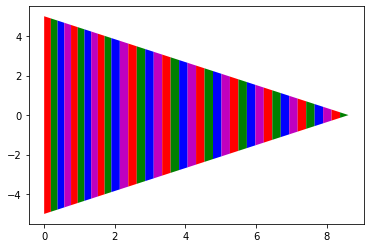

In [7]:
importlib.reload(meshing_ats)

if site_area == 'A':
    arclen = 16
elif site_area == 'B':
    arclen = 6
elif site_area == 'C':
    arclen = 10
elif site_area == 'D':
    arclen = 10
m2 = meshing_ats.Mesh2D.from_Transect_MakePieWedge(x,z_smooth, arclen, curved=False)

print (site_area, arclen)
m2.plot()

In [8]:
x_layer = x[:7]#[0.      0.19017 0.38034 0.57052 0.76069 0.95086]
#z_layer =  [i- for i in z_smooth[:6]]
#print (x_layer, z_layer)


4.968 4.468 1.468
[[1.14103 1.     ]
 [0.5     1.     ]]


/Users/ajc/codes/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


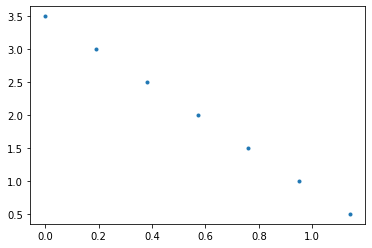

In [8]:
x0,x1 = x[0], x[6]
z_upper = z_smooth[0] - 0.5
z_lower = z_upper - 3.0
print (z_smooth[0], z_upper, z_lower)
from numpy import ones,vstack
from numpy.linalg import lstsq
P = (x1,z_upper)
Q = (x0, z_lower)

P =(x[6],0)
xx = np.linspace(0,x[6],7)
Q = (0.5,3.5)
points = [P,Q]
x_coords, y_coords = zip(*points)

A = vstack([x_coords,ones(len(x_coords))]).T
print (A)
m, c = lstsq(A, y_coords)[0]
#print("Line Solution is y = {m}x + {c}".format(m=m,c=c))
#plt.plot(xx,m*xx+c)
slope = (0.5-3.5)/(x[6]-0)
y = 0.5 + slope*(xx-x[6])
#print (m)
plt.plot(xx,y,'.')

In [10]:

Depth = []
z = 0
for i in range(25):
    z = z + 0.02
    Depth.append(z)

print ('Upper mineral ', z, len(Depth))

dz = .02
for i in range(34):
    dz *= 1.075
    z = z + dz
    if z <3.5:
        Depth.append(z)
    
print ('Ice rich', z, len(Depth))

#IRZ_layer = np.zeros((7,len(Depth)-25))
IRZ_layer=np.zeros((m2.num_cells(), len(Depth)-24))
print (IRZ_layer.shape)
y = 0.5 + slope*(Depth-x[6])
for i in range(m2.num_cells()):
    
    for j in range(24,len(Depth)):
        #print (i)
        #print (x[i])
        #if x[i] < x1 and Depth[j] < 3.5 and Depth[j] >= 0.5:
        if Depth[j] >= 0.5:
            #print (Depth[j], x[i], y[i])
            y1 = 0.5 + slope*(x[i]-x[7])
            if x[i] <= x1 and Depth[j] <= y1:
                #print (i,j, x[i],Depth[j],y1,x[6])
                #break
                IRZ_layer[i][j-24] = 1010#Depth[j]
            else:
                IRZ_layer[i][j-24] = -2000
    #print ('-----------------------------------', y1,Depth[j],x1,x[i])
    #break
print (m2.num_cells(),IRZ_layer[0])
#print (y)

Upper mineral  0.5000000000000001 25
Ice rich 3.5650321116278354 58
(38, 34)
38 [1010. 1010. 1010. 1010. 1010. 1010. 1010. 1010. 1010. 1010. 1010. 1010.
 1010. 1010. 1010. 1010. 1010. 1010. 1010. 1010. 1010. 1010. 1010. 1010.
 1010. 1010. 1010. 1010. 1010. 1010. 1010. 1010. 1010. 1010.]


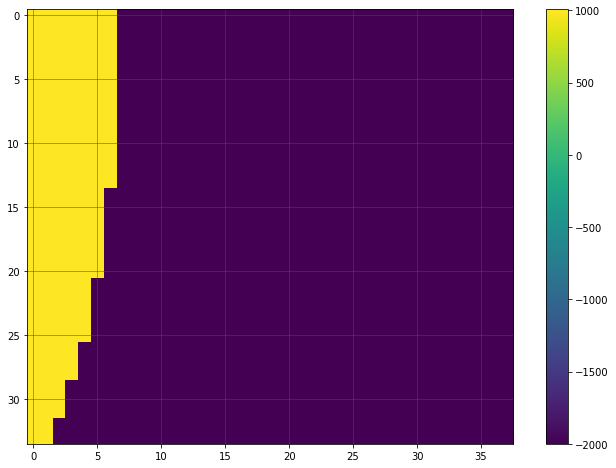

In [11]:
fig ,ax = plt.subplots(figsize=(12,8))
im = plt.imshow(IRZ_layer.transpose())
#plt.imshow([y,xx])
ax = plt.gca()
ax.grid(color='r', linewidth=0.5)
plt.colorbar()
ax.set_aspect('equal')

In [ ]:
outfile = "/Users/ajc/FUSE2/simulations/hillslope/mesh/piewedges/"
layer_types = []
layer_data = []
layer_ncells = []
layer_mat_ids = []

z=0
Z = []

for i in range(1):
    layer_types.append('constant')
    layer_data.append(0.02)
    layer_ncells.append(1)
    layer_mat_ids.append(1001*np.ones((m2.num_cells(),),'i'))
    #layer_mat_ids.append(1001)
    z = z + 0.02
    Z.append(z)
print ('Moss ', z)

for i in range(4):
    layer_types.append('constant')
    layer_data.append(0.02)
    layer_ncells.append(1)
    layer_mat_ids.append(1002*np.ones((m2.num_cells(),),'i'))
    #layer_mat_ids.append(1002)
    z = z + 0.02
    Z.append(z)
print ('Peat ', z)

for i in range(20): 
    layer_types.append('constant')
    layer_data.append(0.02)
    layer_ncells.append(1)
    layer_mat_ids.append(1003*np.ones((m2.num_cells(),),'i'))
    #layer_mat_ids.append(1003)
    z = z + 0.02
    Z.append(z)
print ('Upper mineral ', z)

dz = .02
for i in range(34):
    dz *= 1.075
    layer_types.append("constant")
    layer_data.append(dz)
    layer_ncells.append(1)
    layer_mat_ids.append(-1003*np.ones((m2.num_cells(),),'i'))
    #layer_mat_ids.append(1003)
    z = z + dz
    Z.append(z)
print ('Ice rich', z)

for i in range(25):
    dz *= 1.12
    layer_types.append("constant")
    layer_data.append(dz)
    layer_ncells.append(1)
    layer_mat_ids.append(1003*np.ones((m2.num_cells(),),'i'))
    #layer_mat_ids.append(1003)
    z = z + dz
    Z.append(z)
print (z)


layer_types.append('snapped')
layer_data.append(-45.0) # bottom location
layer_ncells.append(1)
layer_mat_ids.append(1003*np.ones((m2.num_cells(),),'i'))
#layer_mat_ids.append(1003)

mat_ids=np.zeros((m2.num_cells(), len(Depth)-24),'i')
for i in range(m2.num_cells()):
    for j in range(len(Depth)-24): # after layer 20 everything is bedrock
        if IRZ_layer[i,j] == 1010:# (ex.layer_depth[j]<dzs_org_layer[i]):
            mat_ids[i,j]=1010
        else:
            mat_ids[i,j]=1003
print (len(Depth)-24)
for j in range(len(Depth)-24):
    layer_mat_ids[j+25] = mat_ids[:,j]
#print (layer_mat_ids)
m3 = meshing_ats.Mesh3D.extruded_Mesh2D(m2, layer_types, 
                                        layer_data, 
                                        layer_ncells, 
                                        layer_mat_ids)
file= "areaC-3layers-Vladimir-om10cm-case3.exo"
m3.write_exodus(file.encode('utf8'))
